# Geometry via SDF

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/docs/SDF.ipynb)

This notebook introduces signed distance fields in Φ<sub>Flow</sub>.

In [1]:
# %pip install phiflow
from phi.flow import *

## SDF From Existing Geometry

Signed distance fields can easily be created from existing geometry.
The next cell creates a SDF from a pair of spheres.

<Figure size 864x360 with 3 Axes>

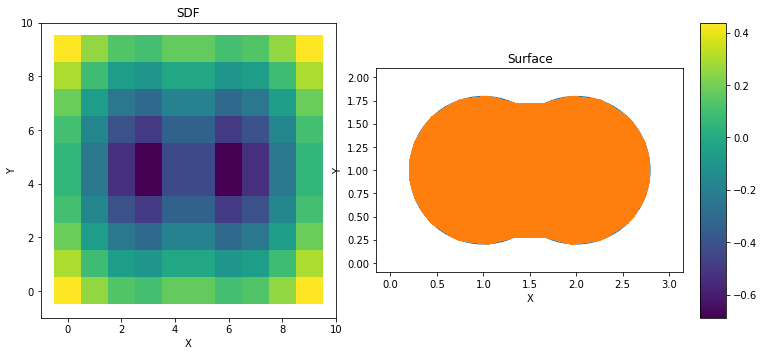

In [6]:
spheres = Sphere(vec(x=[1, 2], y=1), radius=.8)
bounds = Box(x=3, y=2)
sdf = geom.sdf_from_geometry(spheres, bounds, x=10, y=10)
plot({"SDF": sdf.values, "Surface": [spheres, sdf]}, overlay='list')

## Custom SDF Construction

Next, let's construct a SDF from a 2D NumPy array.

c:\ProgramData\Anaconda3\envs\phiflow2\lib\site-packages\phiml\backend\_backend.py:1632: RuntimeWarning: invalid value encountered in power
  return base ** exp


<Figure size 864x360 with 3 Axes>

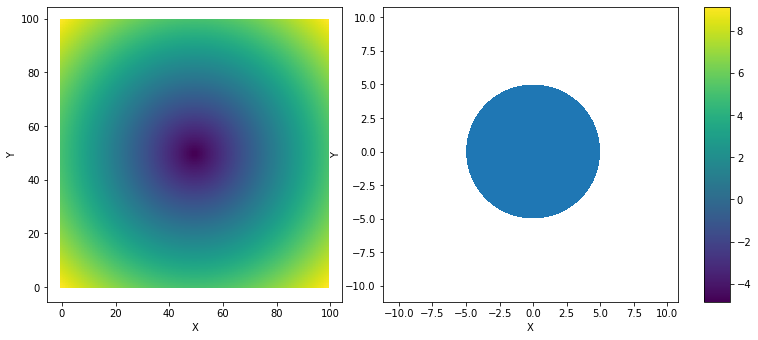

In [18]:
bounds = Box(x=(-10, 10), y=(-10, 10))
grid_x, grid_y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
sdf_np = np.sqrt(grid_x**2 + grid_y**2) - 5
sdf_tensor = tensor(sdf_np, spatial('x,y'))
sdf = geom.SDFGrid(sdf_tensor, bounds)
plot(sdf_tensor, sdf)

## Sampling

SDFs behave like any other geomoetry.
They can be resampled to grids and other fields.

<Figure size 864x360 with 4 Axes>

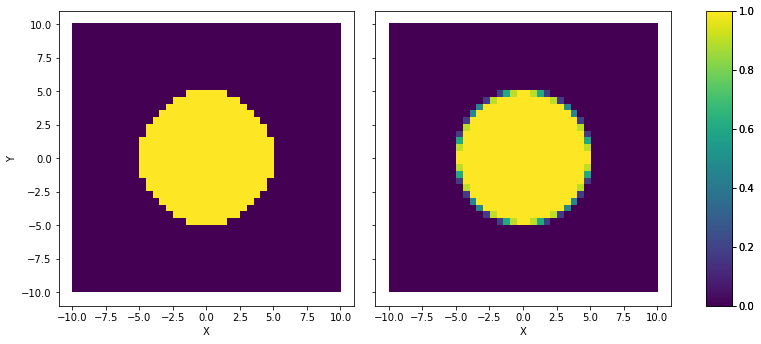

In [19]:
to_grid = CenteredGrid(sdf, 0, bounds, x=40, y=40)
soft = resample(sdf, to_grid, soft=True)
plot(to_grid, soft)

In [20]:
sdf.lies_inside(vec(x=0, y=0))

True

## Querying the Surface

SDFs support querying the closest surface point and normal vector.

c:\ProgramData\Anaconda3\envs\phiflow2\lib\site-packages\phiml\backend\_backend.py:1632: RuntimeWarning: invalid value encountered in power
  return base ** exp


<Figure size 864x360 with 1 Axes>

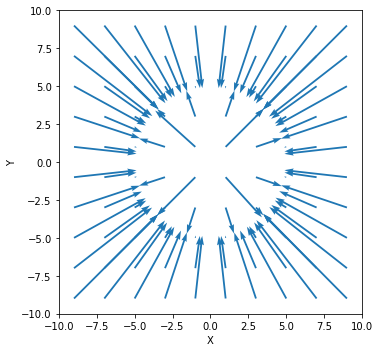

In [23]:
loc = geom.UniformGrid(sdf.resolution.with_sizes(10), sdf.bounds).center
sgn_dist, delta, normal, *_ = sdf.approximate_closest_surface(loc)
plot(PointCloud(loc, delta))